# Machine Learning
### Problem Formulation
This is where we will be removing unneeded columns.

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
)

In [109]:
#load sets
kanto_df = pd.read_csv("Kanto.csv")
johto_df = pd.read_csv("Johto.csv")
hoenn_df = pd.read_csv("Hoenn.csv")

#combine datasets
pokemon_df = pd.concat([kanto_df, johto_df, hoenn_df], ignore_index=True)

In [110]:
print("Shape:", pokemon_df.shape)
print("Missing Values:", pokemon_df.isnull().sum())
print("Target Distribution (Is Legendary):", pokemon_df["Is Legendary"].value_counts())

Shape: (386, 25)
Missing Values: ID                      135
Name                      0
Generation                0
Region                    0
Type 1                    0
Type 2                  204
Base HP                   0
Base Attack               0
Base Defense              0
Base Special Attack       0
Base Special Defense      0
Base Speed                0
Total Base Stats          0
Height (m)                0
Weight (kg)               0
Capture Rate              0
Is Legendary              0
Evolution Stage           0
Hidden Ability            8
Gender Ratio              0
Catch Method              1
Base Friendship           1
Color                     1
Shape                     1
Number                  251
dtype: int64
Target Distribution (Is Legendary): Is Legendary
False    365
True      21
Name: count, dtype: int64


In [111]:
#dropping ID, Number, and Name since they're identifiers
pokemon_df = pokemon_df.drop(columns=["ID", "Number", "Name"])

#filling missing Type 2 with 'None'
pokemon_df["Type 2"] = pokemon_df["Type 2"].fillna("None")

#dropping rows with missing values in categorical columns
pokemon_df = pokemon_df.dropna(subset=[
    "Hidden Ability", "Catch Method", "Base Friendship", "Color", "Shape"
])


In [112]:
print("Dataset Shape After Cleaning:")
print(f"Rows: {pokemon_df.shape[0]}")
print(f"Columns: {pokemon_df.shape[1]}")

print("Remaining Columns:")
print(pokemon_df.columns.tolist())

Dataset Shape After Cleaning:
Rows: 377
Columns: 22
Remaining Columns:
['Generation', 'Region', 'Type 1', 'Type 2', 'Base HP', 'Base Attack', 'Base Defense', 'Base Special Attack', 'Base Special Defense', 'Base Speed', 'Total Base Stats', 'Height (m)', 'Weight (kg)', 'Capture Rate', 'Is Legendary', 'Evolution Stage', 'Hidden Ability', 'Gender Ratio', 'Catch Method', 'Base Friendship', 'Color', 'Shape']


In [113]:
#convert 'Is Legendary' from True/False to 1/0
# (encoading for the target)
pokemon_df["Is Legendary"] = pokemon_df["Is Legendary"].astype(int)

#rescaling the numeric features
numeric_features = [
    "Base HP", "Base Attack", "Base Defense", "Base Special Attack",
    "Base Special Defense", "Base Speed", "Total Base Stats",
    "Height (m)", "Weight (kg)", "Capture Rate", "Base Friendship"
]
scaler = MinMaxScaler()
pokemon_df[numeric_features] = scaler.fit_transform(pokemon_df[numeric_features])

#one-hot encode categorical
categorical_features = [
    "Type 1", "Type 2", "Generation", "Region",
    "Color", "Shape", "Catch Method", "Hidden Ability", "Gender Ratio"
]
pokemon_df = pd.get_dummies(pokemon_df, columns=categorical_features)

In [114]:
#creating trains
X = pokemon_df.drop(columns=["Is Legendary"])
y = pokemon_df["Is Legendary"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


In [115]:
print("Data Split Completed:")
print("Train Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Test Set:", X_test.shape)

Data Split Completed:
Train Set: (263, 224)
Validation Set: (57, 224)
Test Set: (57, 224)


### Train ML Algorithm

In [116]:
# going to use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)


In [117]:
# initialize and train 
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Helps with class imbalance
)
model.fit(X_train, y_train)

#make predictions on validation set
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]  # Probability of class = 1 (Legendary)

#make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]  # Probability of class = 1 (Legendary)

In [118]:
#evaluate model performance
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_proba)
val_classification_report = classification_report(y_val, y_val_pred)


# evaluate model performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_classification_report = classification_report(y_test, y_test_pred)

In [119]:
print("Validation Performance:")
print(f"Accuracy:      {val_accuracy:.2f}")
print(f"Precision:     {val_precision:.2f}")
print(f"Recall:        {val_recall:.2f}")
print(f"F1 Score:      {val_f1:.2f}")
print(f"ROC AUC Score: {val_roc_auc:.2f}")
print("\nClassification Report:\n", val_classification_report)

# Print test set evaluation
print("Test Set Performance:")
print(f"Accuracy:      {test_accuracy:.2f}")
print(f"Precision:     {test_precision:.2f}")
print(f"Recall:        {test_recall:.2f}")
print(f"F1 Score:      {test_f1:.2f}")
print(f"ROC AUC Score: {test_roc_auc:.2f}")
print("\nClassification Report:\n", test_classification_report)

Validation Performance:
Accuracy:      1.00
Precision:     1.00
Recall:        1.00
F1 Score:      1.00
ROC AUC Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00         3

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

Test Set Performance:
Accuracy:      1.00
Precision:     1.00
Recall:        1.00
F1 Score:      1.00
ROC AUC Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00         3

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [120]:
#since there is perfect classification we can assume features (like Total Base Stats, Capture Rate, etc.) are highly predictive of Is Legendary
#or another possibility is that the model may be slightly overfitted bc this might be too small of a dataset

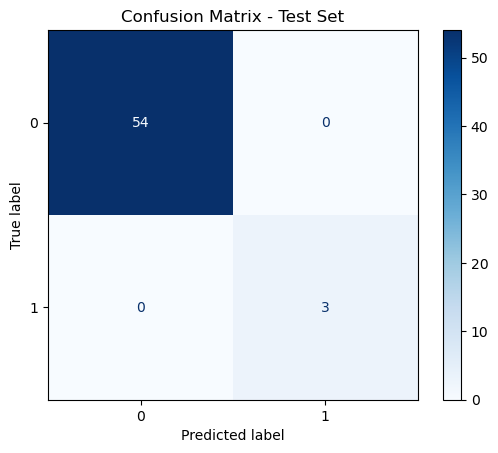

In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

#plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.grid(False)
plt.show()

In [122]:
#shows perfect classification for the model and confirms matrix

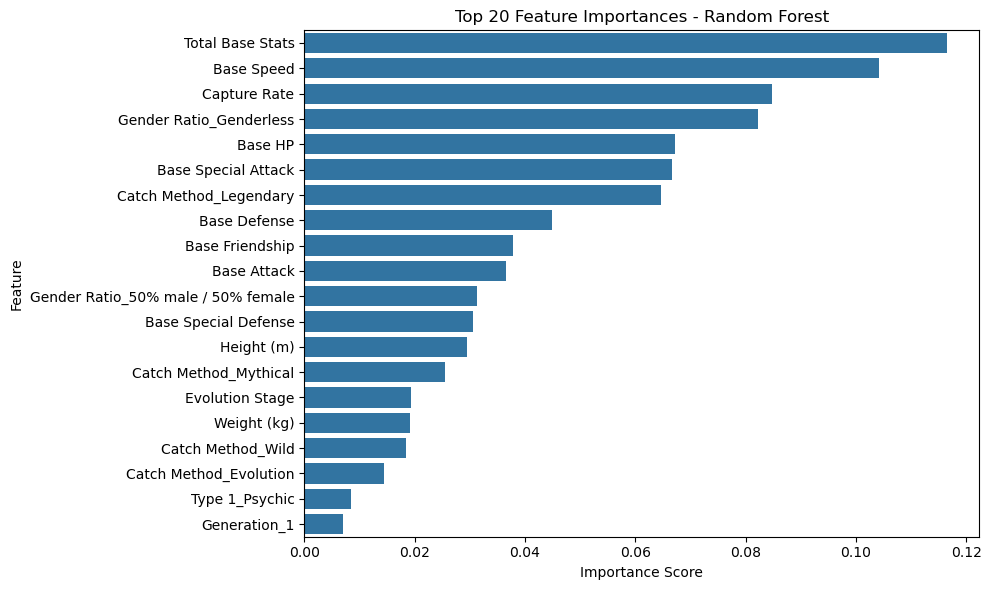

In [123]:
#here is where we are going to see the top features
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#top 20 important features
top_features = feature_importance_df.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, y='Feature', x='Importance')
plt.title("Top 20 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [124]:
# here we can see the most influential stats that are associated with what is a legendary pokemon

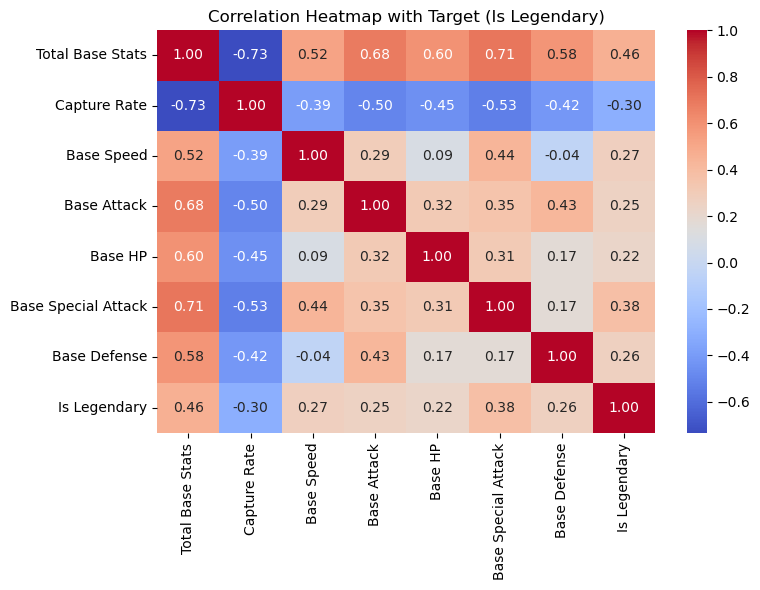

In [125]:
top_numerical_features = [
    'Total Base Stats', 'Capture Rate', 'Base Speed',
    'Base Attack', 'Base HP', 'Base Special Attack', 'Base Defense', 'Is Legendary'
]

plt.figure(figsize=(8, 6))
sns.heatmap(
    pokemon_df[top_numerical_features].corr(),
    annot=True, cmap='coolwarm', fmt='.2f'
)
plt.title("Correlation Heatmap with Target (Is Legendary)")
plt.tight_layout()
plt.show()

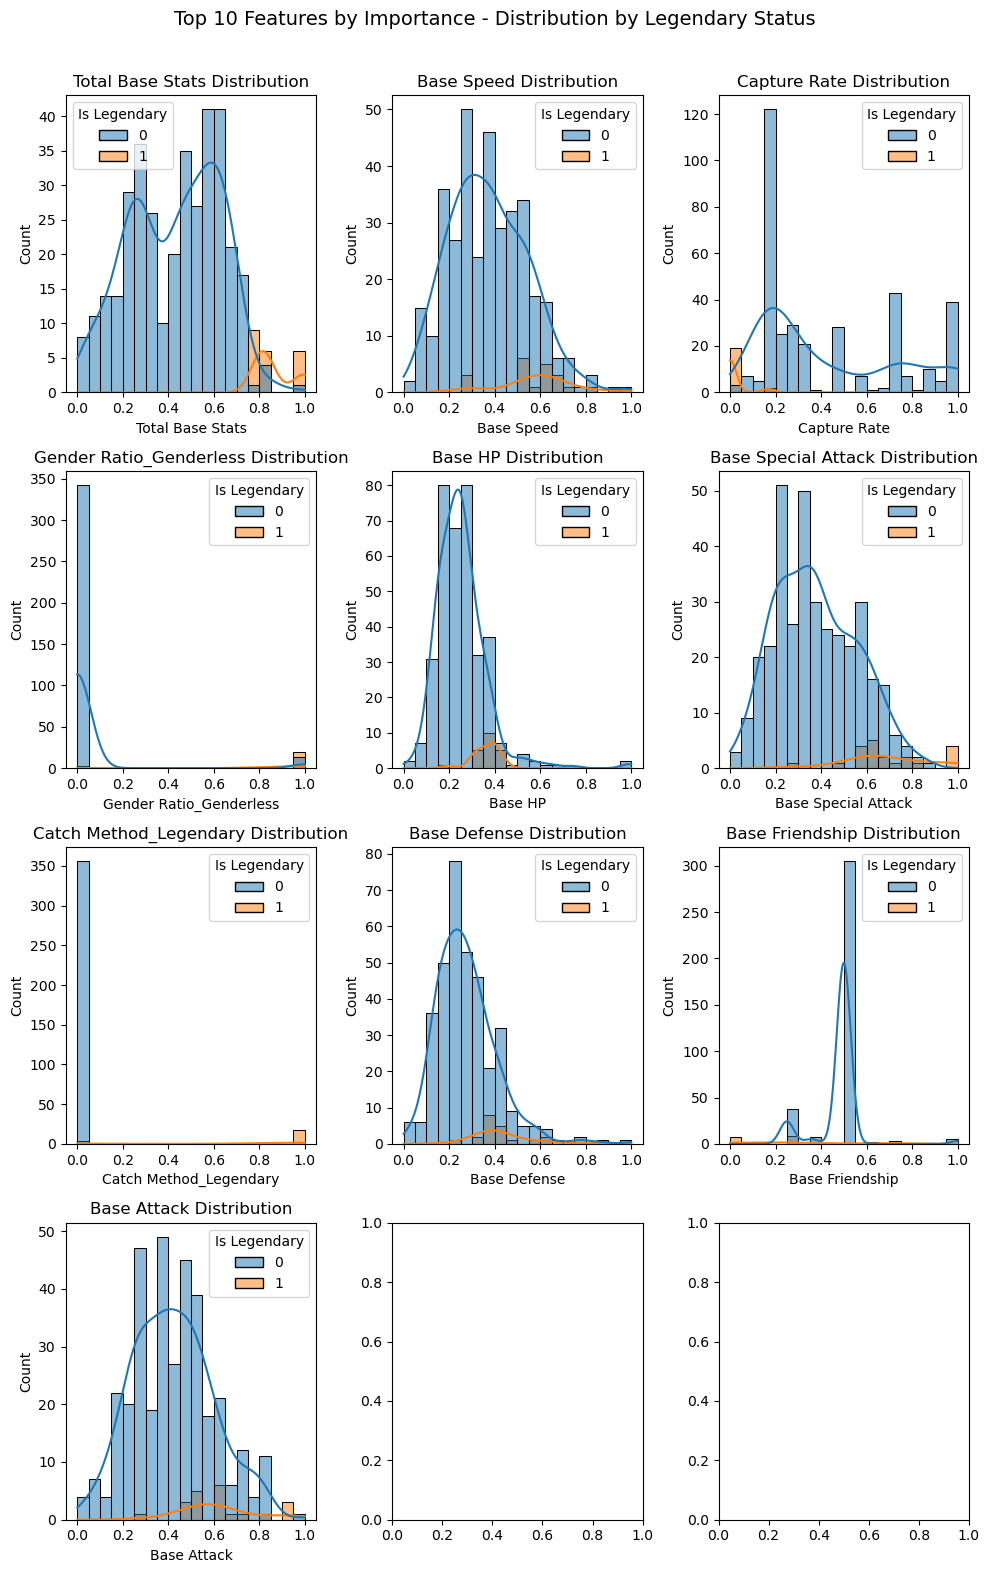

In [126]:
top_10_features = feature_importance_df.head(10)['Feature'].tolist()

n_cols = 3
n_rows = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 16))

#loop through features and plot histograms
for i, feature in enumerate(top_10_features):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(
        data=pokemon_df,
        x=feature,
        hue='Is Legendary',
        bins=20,
        kde=True,
        ax=axes[row][col]
    )
    axes[row][col].set_title(f'{feature} Distribution')


plt.suptitle("Top 10 Features by Importance - Distribution by Legendary Status", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [127]:
# this shows the top 10 features and how it compares to what pokemon are legendary

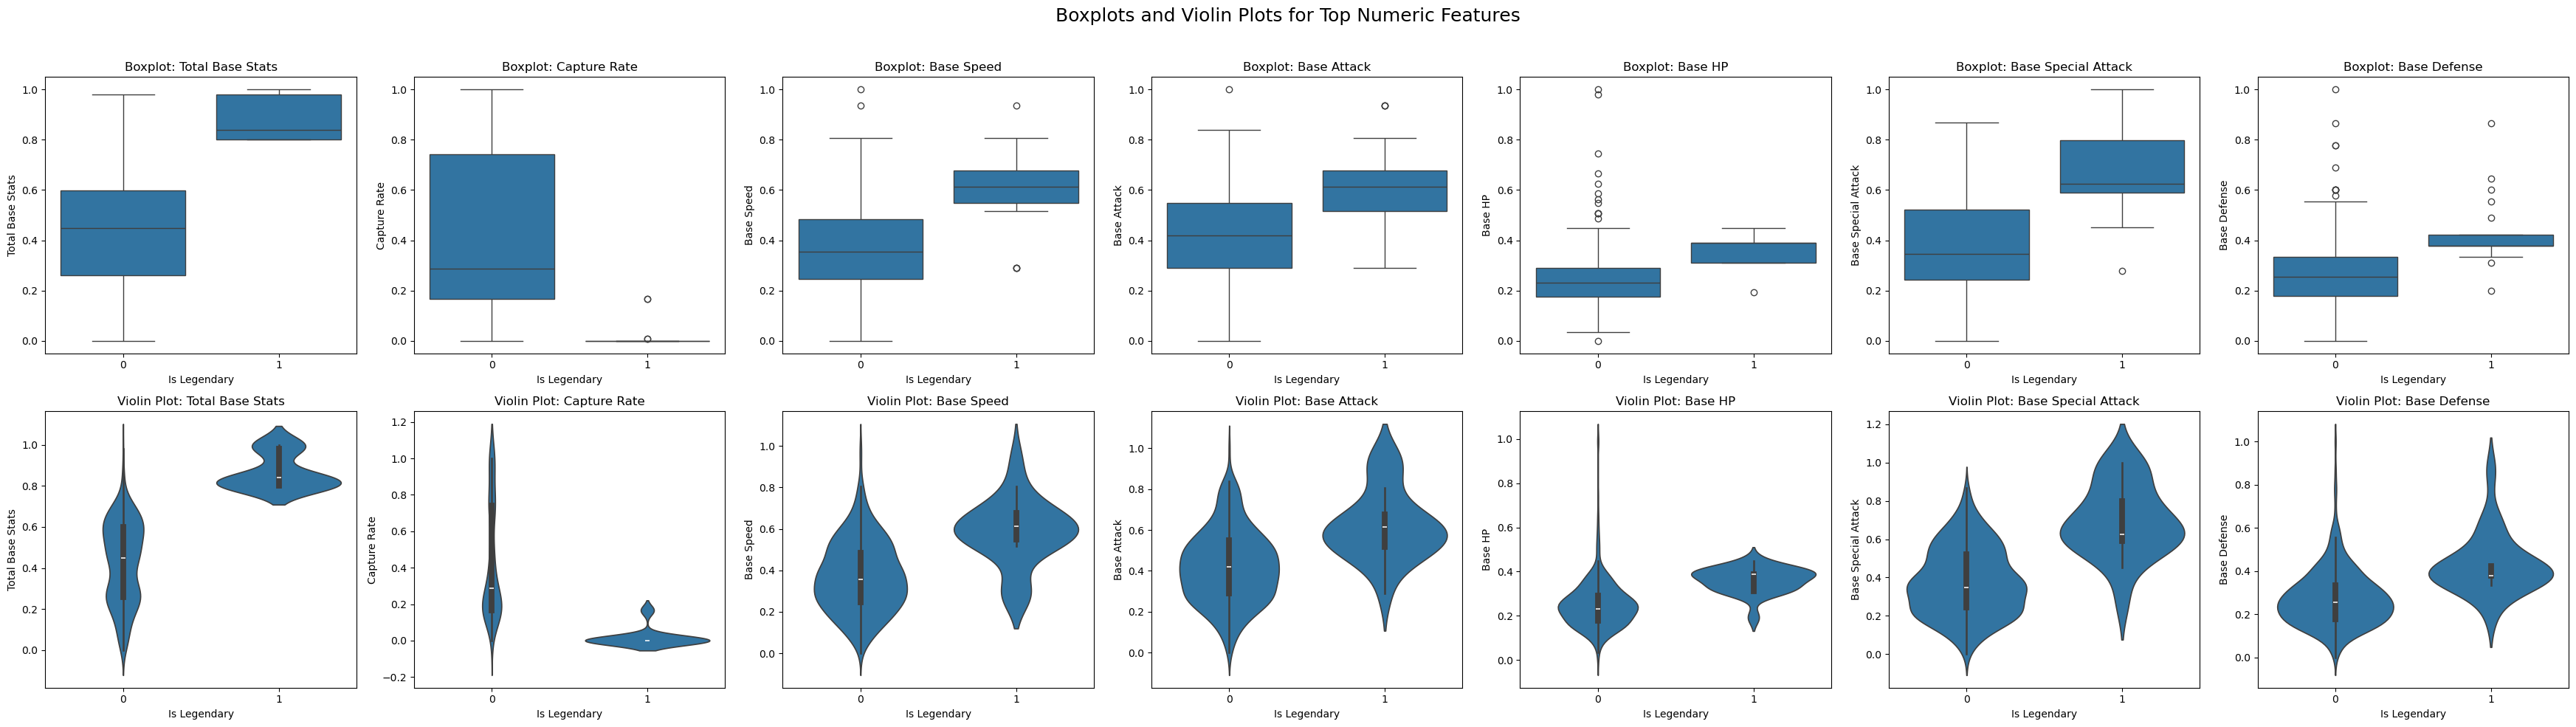

In [128]:
#list of top numeric features
top_numeric_features = ['Total Base Stats', 'Capture Rate', 'Base Speed',
                        'Base Attack', 'Base HP', 'Base Special Attack', 'Base Defense']

#create subplots: 2 rows (Boxplot + Violin) × N columns (one per feature)
fig, axes = plt.subplots(nrows=2, ncols=len(top_numeric_features), figsize=(5 * len(top_numeric_features), 10))

for i, feature in enumerate(top_numeric_features):
    #boxplot
    sns.boxplot(data=pokemon_df, x='Is Legendary', y=feature, ax=axes[0][i])
    axes[0][i].set_title(f'Boxplot: {feature}')
    axes[0][i].set_xlabel('Is Legendary')

    #violin Plot
    sns.violinplot(data=pokemon_df, x='Is Legendary', y=feature, ax=axes[1][i])
    axes[1][i].set_title(f'Violin Plot: {feature}')
    axes[1][i].set_xlabel('Is Legendary')


plt.suptitle("Boxplots and Violin Plots for Top Numeric Features", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [129]:
#lets use knn to compare and see if results may differ from random forest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

#set k=5
larger_k = 5
knn_larger_k = KNeighborsClassifier(n_neighbors=larger_k)

#train
knn_larger_k.fit(X_train, y_train)

#predict on validation and test sets
y_val_pred_k5 = knn_larger_k.predict(X_val)
y_test_pred_k5 = knn_larger_k.predict(X_test)

#predict probabilities (for ROC AUC)
y_val_proba_k5 = knn_larger_k.predict_proba(X_val)[:, 1]
y_test_proba_k5 = knn_larger_k.predict_proba(X_test)[:, 1]

#validation set evaluation
val_accuracy_k5 = accuracy_score(y_val, y_val_pred_k5)
val_precision_k5 = precision_score(y_val, y_val_pred_k5)
val_recall_k5 = recall_score(y_val, y_val_pred_k5)
val_f1_k5 = f1_score(y_val, y_val_pred_k5)
val_auc_k5 = roc_auc_score(y_val, y_val_proba_k5)

#test set evaluation
test_accuracy_k5 = accuracy_score(y_test, y_test_pred_k5)
test_precision_k5 = precision_score(y_test, y_test_pred_k5)
test_recall_k5 = recall_score(y_test, y_test_pred_k5)
test_f1_k5 = f1_score(y_test, y_test_pred_k5)
test_auc_k5 = roc_auc_score(y_test, y_test_proba_k5)

In [130]:
print(f"K = {larger_k}")
print("\nValidation Set Metrics:")
print(f"Accuracy:  {val_accuracy_k5:.2f}")
print(f"Precision: {val_precision_k5:.2f}")
print(f"Recall:    {val_recall_k5:.2f}")
print(f"F1 Score:  {val_f1_k5:.2f}")
print(f"ROC AUC:   {val_auc_k5:.2f}")

print("\nTest Set Metrics:")
print(f"Accuracy:  {test_accuracy_k5:.2f}")
print(f"Precision: {test_precision_k5:.2f}")
print(f"Recall:    {test_recall_k5:.2f}")
print(f"F1 Score:  {test_f1_k5:.2f}")
print(f"ROC AUC:   {test_auc_k5:.2f}")

K = 5

Validation Set Metrics:
Accuracy:  1.00
Precision: 1.00
Recall:    1.00
F1 Score:  1.00
ROC AUC:   1.00

Test Set Metrics:
Accuracy:  0.98
Precision: 1.00
Recall:    0.67
F1 Score:  0.80
ROC AUC:   1.00


In [131]:
# here we can see that for the validation set it got perfect performance again and that this means excellent fit for the validation set and the model correctly predicted every Legendary and Non-Legendary Pokémon in the validation data.
# for the test set, there was a few mistakes that dropped the scores. This shows that while the model is strong, it is not completely flawlesss.
# since being a legendary is a very unique class, it is hard to predict at full accuracy in a test set.

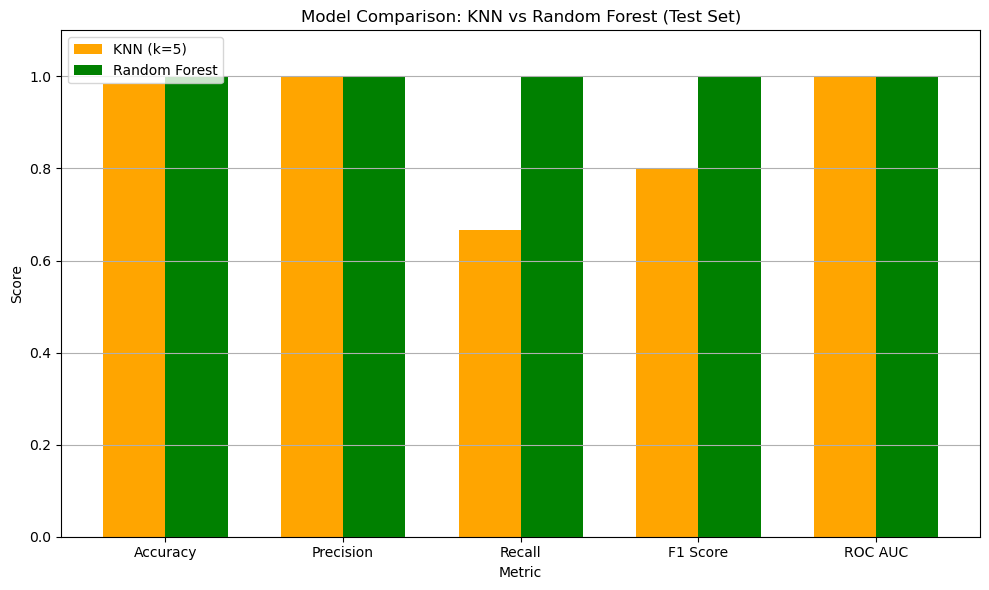

In [132]:
# lets compare knn and random forest
#create comparison DataFrame
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
    "KNN (k=5)": [
        test_accuracy_k5,
        test_precision_k5,
        test_recall_k5,
        test_f1_k5,
        test_auc_k5
    ],
    "Random Forest": [
        test_accuracy,
        test_precision,
        test_recall,
        test_f1,
        test_roc_auc
    ]
})

#prepare data
metrics = comparison_df["Metric"]
knn_scores = comparison_df["KNN (k=5)"]
rf_scores = comparison_df["Random Forest"]
x = range(len(metrics))
bar_width = 0.35

#create bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, knn_scores, width=bar_width, label='KNN (k=5)', color='orange')
plt.bar([i + bar_width for i in x], rf_scores, width=bar_width, label='Random Forest', color='green')

#customize plot
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Model Comparison: KNN vs Random Forest (Test Set)")
plt.xticks([i + bar_width / 2 for i in x], metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [133]:
#wanted to use another model to compare

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

# predict and evaluate on validation set
y_val_pred = logreg.predict(X_val)
y_val_proba = logreg.predict_proba(X_val)[:, 1]

#predict & evaluate on test et
y_test_pred = logreg.predict(X_test)
y_test_proba = logreg.predict_proba(X_test)[:, 1]

print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.75      1.00      0.86         3

    accuracy                           0.98        57
   macro avg       0.88      0.99      0.92        57
weighted avg       0.99      0.98      0.98        57

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00         3

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [134]:
# Using logistic regresion, the model caught all Legendary Pokémon in the validation set (high recall), however, it had some false positives (lower precision), but the F1 score is still strong. So, excellent performance overall.

In [135]:
# Predict using your trained Logistic Regression model
y_test_pred = logreg.predict(X_test)
y_test_proba = logreg.predict_proba(X_test)[:, 1]

# Compute Logistic Regression test metrics
test_accuracy_lr = accuracy_score(y_test, y_test_pred)
test_precision_lr = precision_score(y_test, y_test_pred)
test_recall_lr = recall_score(y_test, y_test_pred)
test_f1_lr = f1_score(y_test, y_test_pred)
test_auc_lr = roc_auc_score(y_test, y_test_proba)

# Now combine all three into your original format
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
    "Logistic Regression": [
        test_accuracy_lr,
        test_precision_lr,
        test_recall_lr,
        test_f1_lr,
        test_auc_lr
    ],
    "KNN (k=5)": [
        test_accuracy_k5,
        test_precision_k5,
        test_recall_k5,
        test_f1_k5,
        test_auc_k5
    ],
    "Random Forest": [
        test_accuracy,
        test_precision,
        test_recall,
        test_f1,
        test_roc_auc
    ]
})

# Display the DataFrame
print(comparison_df)

      Metric  Logistic Regression  KNN (k=5)  Random Forest
0   Accuracy                  1.0   0.982456            1.0
1  Precision                  1.0   1.000000            1.0
2     Recall                  1.0   0.666667            1.0
3   F1 Score                  1.0   0.800000            1.0
4    ROC AUC                  1.0   1.000000            1.0


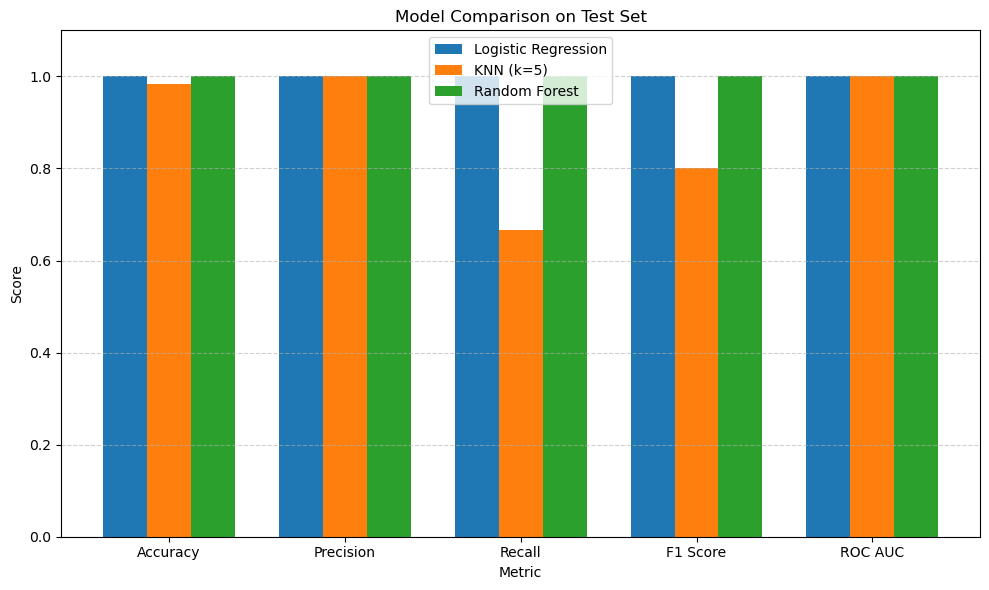

In [136]:
# reset index so 'Metric' becomes a column
comparison_df_reset = comparison_df.reset_index()

#set width of each bar and calculate positions
bar_width = 0.25
index = np.arange(len(comparison_df_reset))

#bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, comparison_df_reset["Logistic Regression"], bar_width, label='Logistic Regression')
plt.bar(index + bar_width, comparison_df_reset["KNN (k=5)"], bar_width, label='KNN (k=5)')
plt.bar(index + 2 * bar_width, comparison_df_reset["Random Forest"], bar_width, label='Random Forest')

#labeling
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Comparison on Test Set')
plt.xticks(index + bar_width, comparison_df_reset['Metric'])
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()